This notebook explores various shapes of control region (CR).

Single mass veto, cubic (3) mass veto, and spherical (3) mass veto.

We have two methods for selecting and pairing jets in the analysis.

One method is based on a fit of the Higgs mass 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils.analysis import Tree
from utils.fileUtils.sr import NMSSM_MX_700_MY_400, QCD_B_List, TTJets, JetHT_Data_UL
from utils.fileUtils import *
from utils.xsecUtils import *
from utils.plotter import Hist, Hist2d, easy_bins
from utils.useCMSstyle import *
from utils.cutConfig import jet_btagWP

tight_b = jet_btagWP[3]
medium_b = jet_btagWP[2]
loose_b = jet_btagWP[1]

In [3]:
mH_bins = easy_bins['mH']
score_bins = easy_bins['score']

In [4]:
import awkward as ak
import numpy as np
import uproot
import vector

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as lines
import matplotlib.patches as patches
import matplotlib as mpl
mpl.rcParams['axes.formatter.limits'] = (-3,3)

In [6]:
def x_bins(bins):
    return (bins[:-1] + bins[1:])/2

In [7]:
def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}$\times 10^{{{e:d}}}$'.format(m=m, e=int(e))

In [2]:
signal_tree = Tree(NMSSM_MX_700_MY_400)
bkgd_tree = Tree(QCD_B_List + [TTJets])
data_tree = Tree(JetHT_Data_UL)

In [9]:
ak.min(signal_tree.jet_pt)
ak.min(signal_tree.gen_HX_b1_recojet_ptRegressed[signal_tree.gen_HX_b1_recojet_ptRegressed > 0])

15.0546875

In [8]:
SR_sgnl_one = (signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) <= 60)
CR_sgnl_one = (signal_tree.b_6j_score > 0.8) & (abs(signal_tree.t6_higgs_m[:,2] - 125) > 60)
CR_data_one = (data_tree.b_6j_score > 0.8) & (abs(data_tree.t6_higgs_m[:,2] - 125) > 60)
SR_data_one = (data_tree.b_6j_score > 0.8) & (abs(data_tree.t6_higgs_m[:,2] - 125) <= 60)
CR_sgnl_one_no6jcut = (signal_tree.b_6j_score > 0) & (abs(signal_tree.t6_higgs_m[:,2] - 125) > 60)
CRSR_sgnl = (signal_tree.b_6j_score > 0.8)
CR_data_one_no6jcut = (data_tree.b_6j_score > 0) & (abs(data_tree.t6_higgs_m[:,2] - 125) > 60)

print(f"{int(ak.sum(CR_sgnl_one_no6jcut)/len(CR_sgnl_one_no6jcut)*100)}% Signal Events in CR without 6j score cut")
print(f"{int(ak.sum(CR_sgnl_one)/len(CR_sgnl_one)*100)}% Signal Events in CR with 6j score cut")
print(f"{int(ak.sum(CR_sgnl_one)/(ak.sum(CR_sgnl_one)+ak.sum(SR_sgnl_one))*100)}% of events in CR out of all events in SR and CR")
print(f"{int(ak.sum(CR_sgnl_one)/(ak.sum(CRSR_sgnl))*100)}% of events in CR out of all events with NN6j > 0.8")
print(f"{int(ak.sum(SR_sgnl_one)/(ak.sum(CRSR_sgnl))*100)}% of events in SR out of all events with NN6j > 0.8")
print(f"{int(ak.sum(CR_data_one_no6jcut)/len(CR_data_one_no6jcut)*100)}% Data Events in CR without 6j score cut")


SR_sgnl_cube = (signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) <= 60, axis=1)
SR_data_cube = (data_tree.b_6j_score > 0.8) & ak.all(abs(data_tree.t6_higgs_m - 125) <= 60, axis=1)
CR_sgnl_cube = (signal_tree.b_6j_score > 0.8) & ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1)
CR_data_cube = (data_tree.b_6j_score > 0.8) & ak.all(abs(data_tree.t6_higgs_m - 125) > 60, axis=1)
CR_sgnl_cube_no6jcut = (signal_tree.b_6j_score > 0) & (ak.all(abs(signal_tree.t6_higgs_m - 125) > 60, axis=1))
CR_data_cube_no6jcut = (data_tree.b_6j_score > 0) & (ak.all(abs(data_tree.t6_higgs_m - 125) > 60, axis=1))

print()
print(f"{int(ak.sum(CR_sgnl_cube_no6jcut)/len(CR_sgnl_cube_no6jcut)*100)}% Signal Events in CR without 6j score cut")
print(f"{int(ak.sum(CR_sgnl_cube)/len(CR_sgnl_cube)*100)}% Signal Events in CR with 6j score cut")
print(f"{int(ak.sum(CR_sgnl_cube)/(ak.sum(CR_sgnl_cube)+ak.sum(SR_sgnl_cube))*100)}% of events in CR out of all events in SR and CR")
print(f"{int(ak.sum(CR_sgnl_cube)/(ak.sum(CRSR_sgnl))*100)}% of events in CR out of all events with NN6j > 0.8")
print(f"{int(ak.sum(SR_sgnl_cube)/(ak.sum(CRSR_sgnl))*100)}% of events in SR out of all events with NN6j > 0.8")
print(f"{int(ak.sum(CR_data_cube_no6jcut)/len(CR_data_cube_no6jcut)*100)}% Data Events in CR without 6j score cut")

16% Signal Events in CR without 6j score cut
6% Signal Events in CR with 6j score cut
11% of events in CR out of all events in SR and CR
11% of events in CR out of all events with NN6j > 0.8
88% of events in SR out of all events with NN6j > 0.8
30% Data Events in CR without 6j score cut

10% Signal Events in CR without 6j score cut
3% Signal Events in CR with 6j score cut
8% of events in CR out of all events in SR and CR
6% of events in CR out of all events with NN6j > 0.8
75% of events in SR out of all events with NN6j > 0.8
15% Data Events in CR without 6j score cut


In [10]:
print("SINGLE mass veto")
print("S/B in SR: ",ak.sum(SR_sgnl_one)/ak.sum(SR_data_one))
print("S/B in CR: ",ak.sum(CR_sgnl_one)/ak.sum(CR_data_one))

print()
print("TRIPLE mass veto")
print("S/B in SR: ",ak.sum(SR_sgnl_cube)/ak.sum(SR_data_cube))
print("S/B in CR: ",ak.sum(CR_sgnl_cube)/ak.sum(CR_data_cube))

SINGLE mass veto
S/B in SR:  1.4231726528040327
S/B in CR:  0.498291015625

TRIPLE mass veto
S/B in SR:  1.9073235229303886
S/B in CR:  0.5775855032242266


In [27]:
HX_b1 = vector.obj(
    pt=signal_tree.gen_HX_b1_recojet_ptRegressed, 
    eta=signal_tree.gen_HX_b1_recojet_eta, 
    phi=signal_tree.gen_HX_b1_recojet_phi, 
    m=signal_tree.gen_HX_b1_recojet_m)
HX_b2 = vector.obj(
    pt=signal_tree.gen_HX_b2_recojet_ptRegressed, 
    eta=signal_tree.gen_HX_b2_recojet_eta, 
    phi=signal_tree.gen_HX_b2_recojet_phi, 
    m=signal_tree.gen_HX_b2_recojet_m)
HY1_b1 = vector.obj(
    pt=signal_tree.gen_HY1_b1_recojet_ptRegressed, 
    eta=signal_tree.gen_HY1_b1_recojet_eta, 
    phi=signal_tree.gen_HY1_b1_recojet_phi, 
    m=signal_tree.gen_HY1_b1_recojet_m)
HY1_b2 = vector.obj(
    pt=signal_tree.gen_HY1_b2_recojet_ptRegressed, 
    eta=signal_tree.gen_HY1_b2_recojet_eta, 
    phi=signal_tree.gen_HY1_b2_recojet_phi, 
    m=signal_tree.gen_HY1_b2_recojet_m)
HY2_b1 = vector.obj(
    pt=signal_tree.gen_HY2_b1_recojet_ptRegressed, 
    eta=signal_tree.gen_HY2_b1_recojet_eta, 
    phi=signal_tree.gen_HY2_b1_recojet_phi, 
    m=signal_tree.gen_HY2_b1_recojet_m)
HY2_b2 = vector.obj(
    pt=signal_tree.gen_HY2_b2_recojet_ptRegressed, 
    eta=signal_tree.gen_HY2_b2_recojet_eta, 
    phi=signal_tree.gen_HY2_b2_recojet_phi, 
    m=signal_tree.gen_HY2_b2_recojet_m)

HX = HX_b1 + HX_b2
HY1 = HY1_b1 + HY1_b2
HY2 = HY2_b1 + HY2_b2

mH = ak.concatenate((HX.m, HY1.m, HY2.m))

In [28]:
def get_masked_dist(bkgd_list):
    new_list = []
    for bkgd_dist, scores, mass in zip(bkgd_list, bkgd_tree.b_6j_score, bkgd_tree.t6_higgs_m):
        new_list.append(bkgd_dist[(scores > 0.8) & ak.all(abs(mass - 125) > 60, axis=1)])

5%


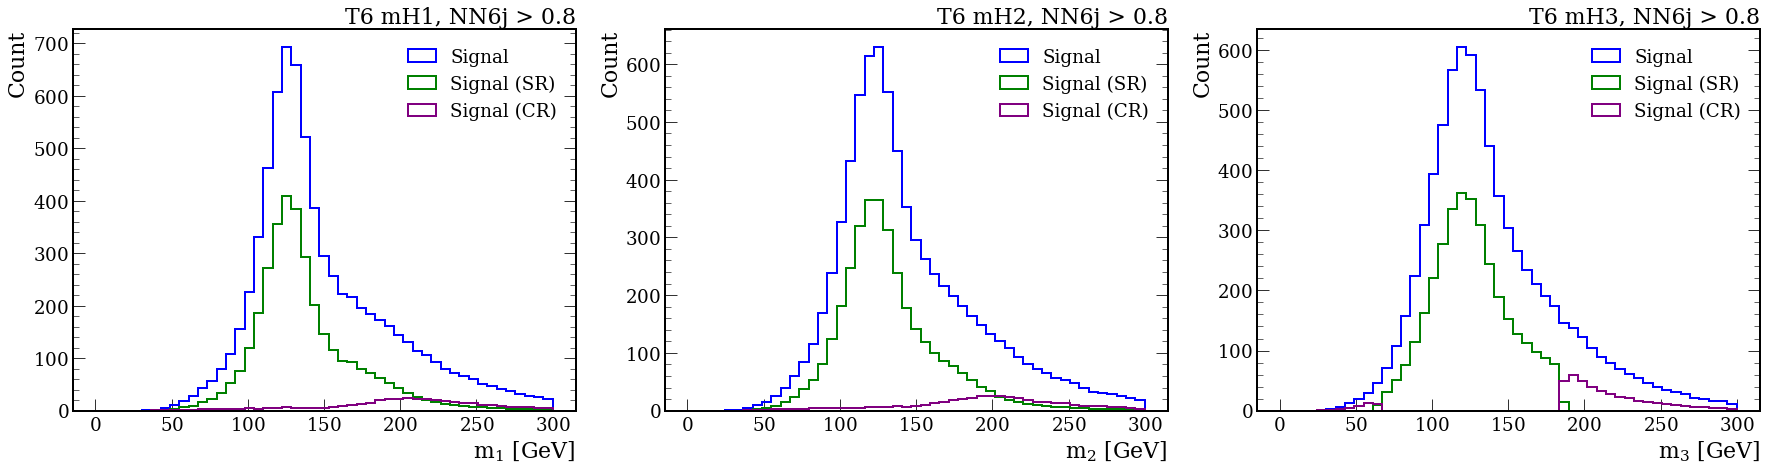

In [61]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6 mH1, NN6j > 0.8', loc='right')
n_s, b = Hist(signal_tree.t6_higgs_m[:,0], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)
n_SR, b = Hist(signal_tree.t6_higgs_m[:,0][SR_sgnl_one], bins=mH_bins, ax=ax, label='Signal (SR)', color='green', scale=signal_tree.scale)
n_CR, b = Hist(signal_tree.t6_higgs_m[:,0][CR_sgnl_one], bins=mH_bins, ax=ax, label='Signal (CR)', color='purple', scale=signal_tree.scale)
print(f"{int(n_CR.sum()/n_s.sum()*100)}%")

# n_b, b = Hist(t6_mH1_6jcut_mH3cut_SR_list, bins=mH_bins, ax=ax, label='MC Bkgd', scale=bkgd_tree.scale, color='red')
ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Count')
# print(n_s.sum()/np.sqrt(n_b.sum()))
SR_H3 = n_s.sum()

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='right')
n_s, b = Hist(signal_tree.t6_higgs_m[:,1], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
n_s, b = Hist(signal_tree.t6_higgs_m[:,1][SR_sgnl_one], bins=mH_bins, ax=ax, label='Signal (SR)', color='green', scale=signal_tree.scale)
n_s, b = Hist(signal_tree.t6_higgs_m[:,1][CR_sgnl_one], bins=mH_bins, ax=ax, label='Signal (CR)', color='purple', scale=signal_tree.scale)
# n_b, b = Hist(t6_mH2_6jcut_mH3cut_SR_list, bins=mH_bins, ax=ax, label='MC Bkgd', scale=bkgd_tree.scale, color='red')
ax.set_xlabel(r'$m_2$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='right')
n_s, b = Hist(signal_tree.t6_higgs_m[:,2], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
n_s, b = Hist(signal_tree.t6_higgs_m[:,2][SR_sgnl_one], bins=mH_bins, ax=ax, label='Signal (SR)', color='green', scale=signal_tree.scale)
n_s, b = Hist(signal_tree.t6_higgs_m[:,2][CR_sgnl_one], bins=mH_bins, ax=ax, label='Signal (CR)', color='purple', scale=signal_tree.scale)
# n_b, b = Hist(t6_mH3_6jcut_mH3cut_SR_list, bins=mH_bins, ax=ax, label='MC Bkgd', scale=bkgd_tree.scale, color='red')
ax.set_xlabel(r'$m_3$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/T6_SRvCR.pdf')

# THREE mass veto

/tmp/ipykernel_20803/2453814758.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '0', '', '1', '', '2', '', '3', '', '4'])


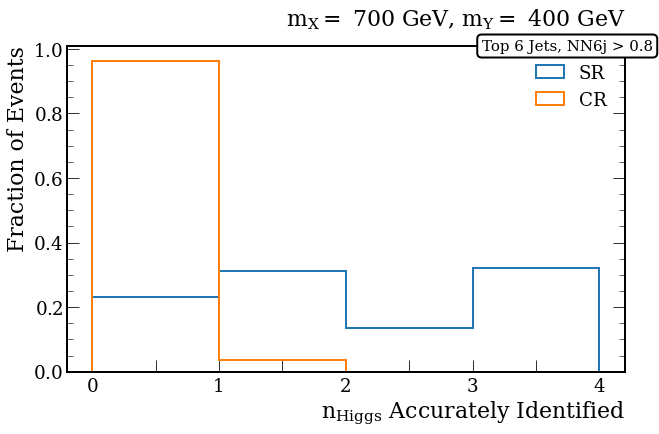

In [55]:
fig, ax = plt.subplots(figsize=(10,6))

n, e = Hist(signal_tree.nfound_t6_h[SR_sgnl_cube], bins=np.arange(5), density=1, label='SR', ax=ax)
n, e = Hist(signal_tree.nfound_t6_h[CR_sgnl_cube], bins=np.arange(5), density=1, label='CR', ax=ax, color='C1')
# n, e = Hist(signal_tree.nfound_t6_h[SR_sgnl_one & (signal_tree.nfound_presel == 6)], bins=np.arange(5), density=1, label='SR (6b)', ax=ax, color='C2')
ax.set_title(signal_tree.sample, loc='right', pad=20.0)
ax.set_xticklabels(['', '0', '', '1', '', '2', '', '3', '', '4'])
ax.set_xlabel(r'$n_\mathrm{Higgs}$ Accurately Identified')
ax.set_ylabel('Fraction of Events')
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)

fig.savefig('plots/sig_to_bkg/T6_CRvSR_n_higgs_accurate.pdf')

# SINGLE mass veto

/tmp/ipykernel_20803/3584187775.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '0', '', '1', '', '2', '', '3', '', '4'])


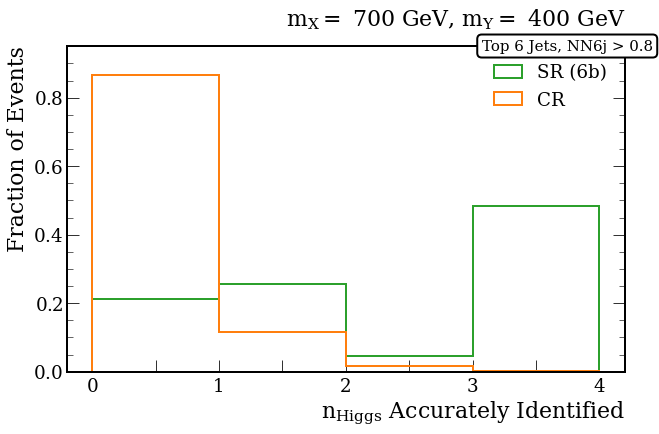

In [60]:
fig, ax = plt.subplots(figsize=(10,6))

# n, e = Hist(signal_tree.nfound_t6_h[SR_sgnl_one], bins=np.arange(5), density=1, label='SR', ax=ax)
n, e = Hist(signal_tree.nfound_t6_h[SR_sgnl_one & (signal_tree.nfound_presel == 6)], bins=np.arange(5), density=1, label='SR (6b)', ax=ax, color='C2')
n, e = Hist(signal_tree.nfound_t6_h[CR_sgnl_one], bins=np.arange(5), density=1, label='CR', ax=ax, color='C1')
ax.set_title(signal_tree.sample, loc='right', pad=20.0)
ax.set_xticklabels(['', '0', '', '1', '', '2', '', '3', '', '4'])
ax.set_xlabel(r'$n_\mathrm{Higgs}$ Accurately Identified')
ax.set_ylabel('Fraction of Events')
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
ax.set_ylim(0, n.max()*1.1)
# ax.legend(loc=2)
fig.savefig('plots/sig_to_bkg/T6_CRvSR_n_higgs_accurate.pdf')

In [31]:
SR_sgnl_one_nn = (signal_tree.b_6j_score > 0.8) & (abs(signal_tree.nn_higgs_m[:,2] - 125) < 60)
CR_sgnl_one_nn = (signal_tree.b_6j_score > 0.8) & (abs(signal_tree.nn_higgs_m[:,2] - 125) > 60)
CR_data_one_nn = (data_tree.b_6j_score > 0.8) & (abs(data_tree.nn_higgs_m[:,2] - 125) > 60)

print(f"{int(ak.sum(SR_sgnl_one_nn)/len(SR_sgnl_one_nn)*100)}%")
print(f"{int(ak.sum(CR_sgnl_one_nn)/len(CR_sgnl_one_nn)*100)}%")
print(f"{int(ak.sum(CR_data_one_nn)/len(CR_data_one_nn)*100)}%")

SR_sgnl_3d_nn = (signal_tree.b_6j_score > 0.8) & (signal_tree.b_3d_score > 0.8)
CR_sgnl_3d_nn = (signal_tree.b_6j_score > 0.8) & (signal_tree.b_3d_score < 0.8)
CR_data_3d_nn = (data_tree.b_6j_score > 0.8) & (data_tree.b_3d_score < 0.8)

print(f"{int(ak.sum(CR_sgnl_3d_nn)/len(CR_sgnl_3d_nn)*100)}%")
print(f"{int(ak.sum(CR_data_3d_nn)/len(CR_data_3d_nn)*100)}%")

48%
2%
3%
2%
7%


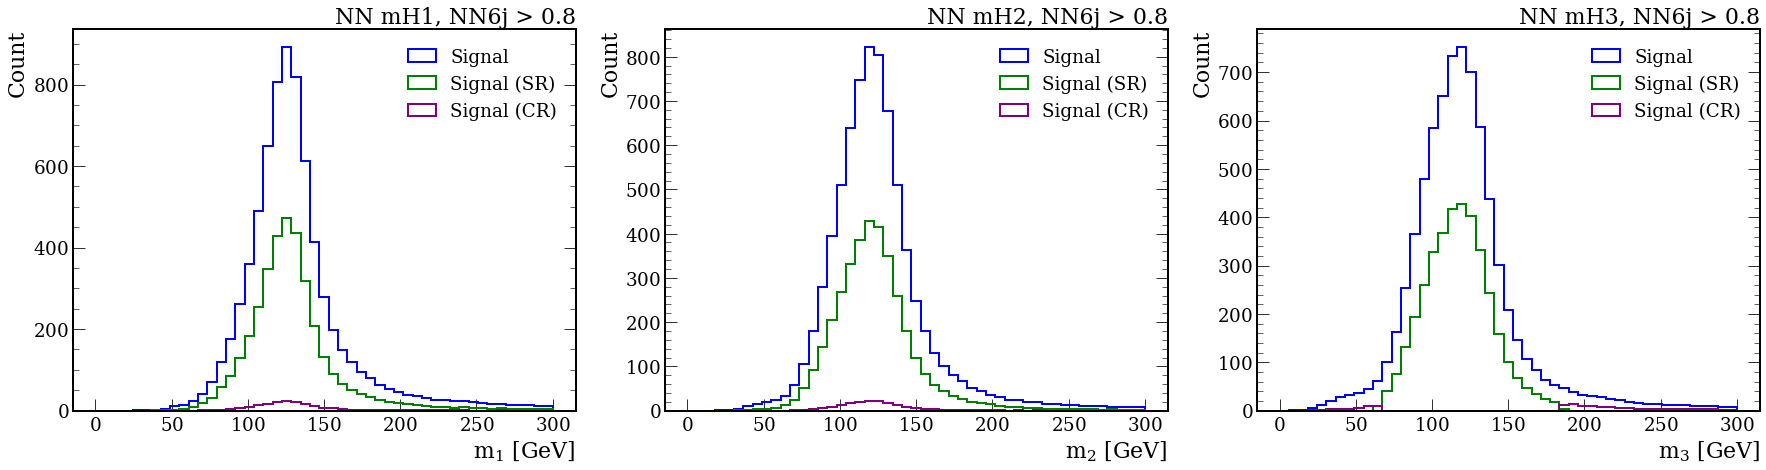

In [63]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('NN mH1, NN6j > 0.8', loc='right')
n_s, b = Hist(signal_tree.nn_higgs_m[:,0], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)
n_SR, b = Hist(signal_tree.nn_higgs_m[:,0][SR_sgnl_one_nn], bins=mH_bins, ax=ax, label='Signal (SR)', color='green', scale=signal_tree.scale)
n_CR, b = Hist(signal_tree.nn_higgs_m[:,0][CR_sgnl_one_nn], bins=mH_bins, ax=ax, label='Signal (CR)', color='purple', scale=signal_tree.scale)
# n_b, b = Hist(t6_mH1_6jcut_mH3cut_SR_list, bins=mH_bins, ax=ax, label='MC Bkgd', scale=bkgd_tree.scale, color='red')
ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Count')
# print(n_s.sum()/np.sqrt(n_b.sum()))
SR_H3 = n_s.sum()

ax = axs[1]
ax.set_title('NN mH2, NN6j > 0.8', loc='right')
n_s, b = Hist(signal_tree.nn_higgs_m[:,1], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
n_s, b = Hist(signal_tree.nn_higgs_m[:,1][SR_sgnl_one_nn], bins=mH_bins, ax=ax, label='Signal (SR)', color='green', scale=signal_tree.scale)
n_s, b = Hist(signal_tree.nn_higgs_m[:,1][CR_sgnl_one_nn], bins=mH_bins, ax=ax, label='Signal (CR)', color='purple', scale=signal_tree.scale)
# n_b, b = Hist(t6_mH2_6jcut_mH3cut_SR_list, bins=mH_bins, ax=ax, label='MC Bkgd', scale=bkgd_tree.scale, color='red')
ax.set_xlabel(r'$m_2$ [GeV]')
ax.set_ylabel('Count')

ax = axs[2]
ax.set_title('NN mH3, NN6j > 0.8', loc='right')
n_s, b = Hist(signal_tree.nn_higgs_m[:,2], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
n_s, b = Hist(signal_tree.nn_higgs_m[:,2][SR_sgnl_one_nn], bins=mH_bins, ax=ax, label='Signal (SR)', color='green', scale=signal_tree.scale)
n_s, b = Hist(signal_tree.nn_higgs_m[:,2][CR_sgnl_one_nn], bins=mH_bins, ax=ax, label='Signal (CR)', color='purple', scale=signal_tree.scale)
# n_b, b = Hist(t6_mH3_6jcut_mH3cut_SR_list, bins=mH_bins, ax=ax, label='MC Bkgd', scale=bkgd_tree.scale, color='red')
ax.set_xlabel(r'$m_3$ [GeV]')
ax.set_ylabel('Count')

plt.tight_layout()

fig.savefig('plots/sig_to_bkg/NN_SRvCR.pdf')

# SINGLE mass veto

/tmp/ipykernel_20803/2546270715.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '0', '', '1', '', '2', '', '3', '', '4'])


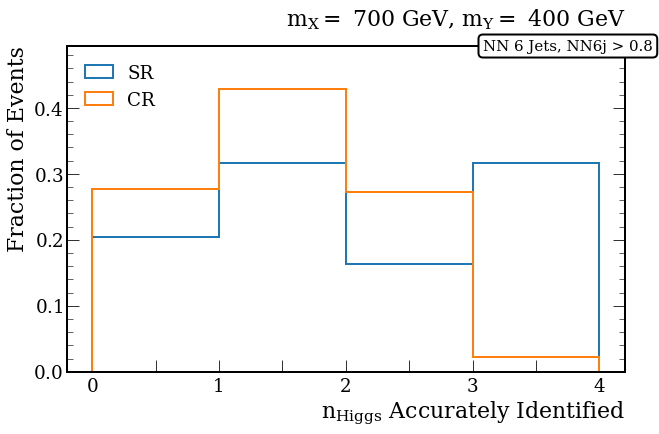

In [52]:
fig, ax = plt.subplots(figsize=(10,6))

# n, e = Hist(signal_tree.nfound_nn_h, bins=np.arange(5), density=1, label='All Signal', ax=ax)
n, e = Hist(signal_tree.nfound_nn_h[SR_sgnl_one_nn], bins=np.arange(5), density=1, label='SR', ax=ax, color='C0')
n, e = Hist(signal_tree.nfound_nn_h[CR_sgnl_one_nn], bins=np.arange(5), density=1, label='CR', ax=ax, color='C1')
# n, e = Hist(signal_tree.nfound_nn_h[SR_sgnl_one_nn & (signal_tree.nfound_presel == 6)], bins=np.arange(5), density=1, label='SR (6b)', ax=ax, color='C2')
ax.set_title(signal_tree.sample, loc='right', pad=20.0)
ax.set_xticklabels(['', '0', '', '1', '', '2', '', '3', '', '4'])
ax.set_xlabel(r'$n_\mathrm{Higgs}$ Accurately Identified')
ax.set_ylabel('Fraction of Events')
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.1)
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "NN 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
ax.legend(loc=2)

fig.savefig('plots/sig_to_bkg/NN_CRvSR_n_higgs_accurate.pdf')

/tmp/ipykernel_20803/1656427569.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '0', '', '1', '', '2', '', '3', '', '4'])


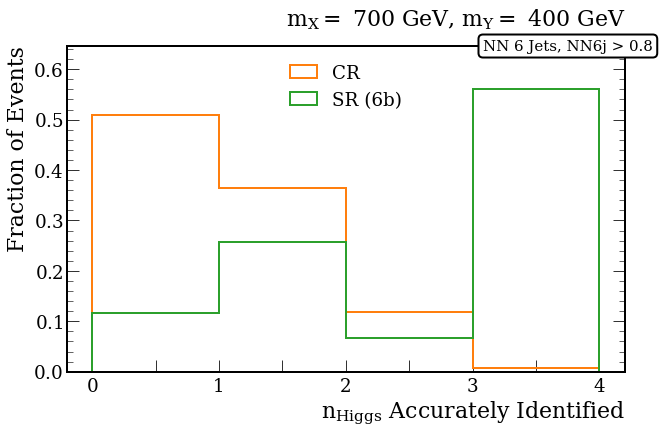

In [68]:
fig, ax = plt.subplots(figsize=(10,6))

# n, e = Hist(signal_tree.nfound_nn_h, bins=np.arange(5), density=1, label='All Signal', ax=ax)
# n, e = Hist(signal_tree.nfound_nn_h[SR_sgnl_3d_nn], bins=np.arange(5), density=1, label='SR', ax=ax, color='C0')
n, e = Hist(signal_tree.nfound_nn_h[CR_sgnl_3d_nn], bins=np.arange(5), density=1, label='CR', ax=ax, color='C1')
n, e = Hist(signal_tree.nfound_nn_h[SR_sgnl_3d_nn & (signal_tree.nfound_presel == 6)], bins=np.arange(5), density=1, label='SR (6b)', ax=ax, color='C2')
ax.set_title(signal_tree.sample, loc='right', pad=20.0)
ax.set_xticklabels(['', '0', '', '1', '', '2', '', '3', '', '4'])
ax.set_xlabel(r'$n_\mathrm{Higgs}$ Accurately Identified')
ax.set_ylabel('Fraction of Events')
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.1)
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "NN 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)

ax.legend(loc=9)

fig.savefig('plots/sig_to_bkg/NN_CRvSR_n_higgs_accurate.pdf')

/tmp/ipykernel_20803/3438727579.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '0', '', '1', '', '2', '', '3', '', '4'])


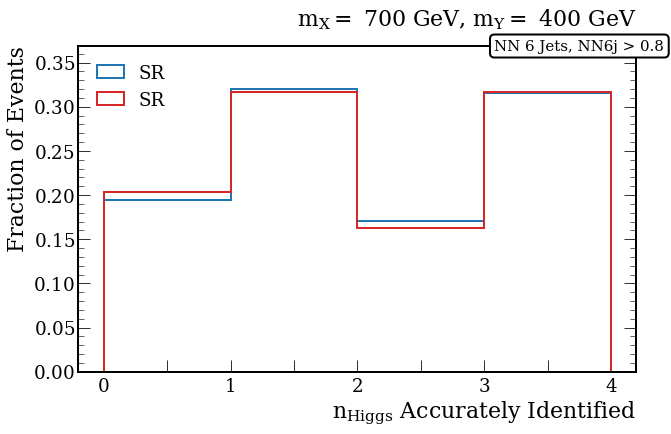

In [70]:
fig, ax = plt.subplots(figsize=(10,6))

# n, e = Hist(signal_tree.nfound_nn_h, bins=np.arange(5), density=1, label='All Signal', ax=ax)
n, e = Hist(signal_tree.nfound_nn_h[SR_sgnl_3d_nn], bins=np.arange(5), density=1, label='SR', ax=ax, color='C0')
n, e = Hist(signal_tree.nfound_nn_h[SR_sgnl_one_nn], bins=np.arange(5), density=1, label='SR', ax=ax, color='C3')
# n, e = Hist(signal_tree.nfound_nn_h[CR_sgnl_3d_nn], bins=np.arange(5), density=1, label='CR', ax=ax, color='C1')
# n, e = Hist(signal_tree.nfound_nn_h[SR_sgnl_3d_nn & (signal_tree.nfound_presel == 6)], bins=np.arange(5), density=1, label='SR (6b)', ax=ax, color='C2')
ax.set_title(signal_tree.sample, loc='right', pad=20.0)
ax.set_xticklabels(['', '0', '', '1', '', '2', '', '3', '', '4'])
ax.set_xlabel(r'$n_\mathrm{Higgs}$ Accurately Identified')
ax.set_ylabel('Fraction of Events')
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.1)
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "NN 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)

ax.legend(loc=2)

2.7563812306192808
0.05199692208404694
394.17215355734453


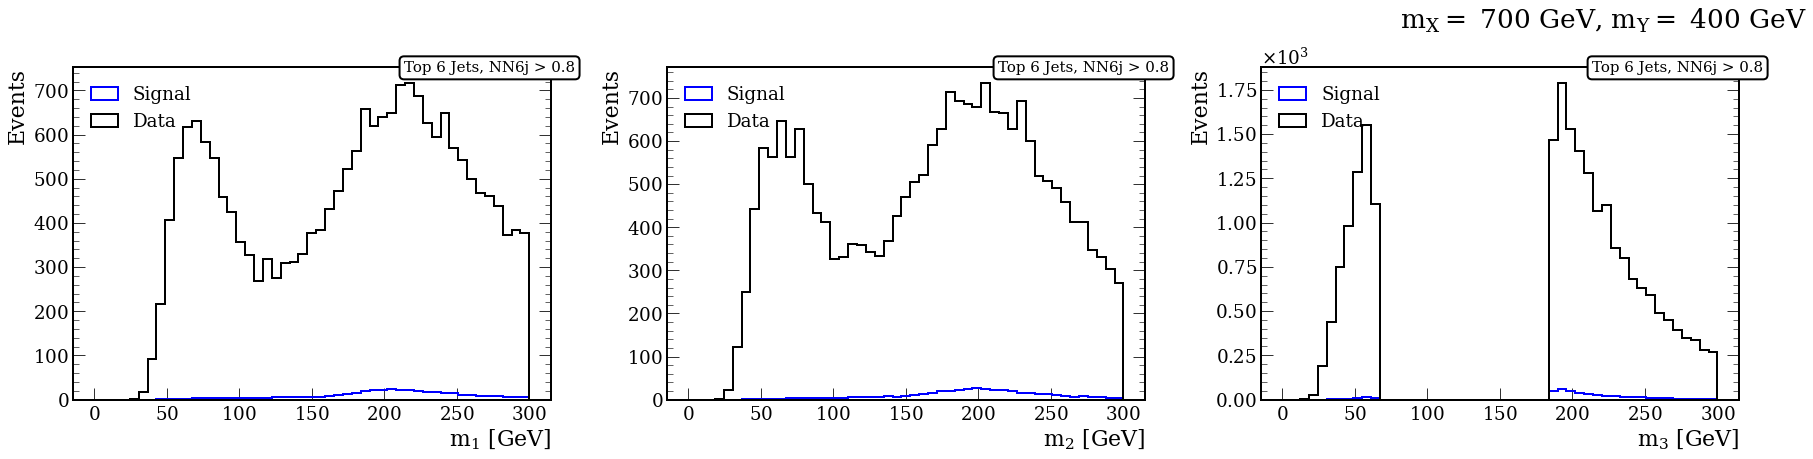

In [34]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

fig.suptitle(signal_tree.sample, x=.9, y=.93)

ax = axs[0]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(signal_tree.t6_higgs_m[:,0][CR_sgnl_one], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)
n_d, b = Hist(data_tree.t6_higgs_m[:,0][CR_data_one], bins=mH_bins, ax=ax, label='Data', color='black')
ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)
print(n_s.sum()/np.sqrt(n_d.sum()))
print(n_s.sum()/(SR_H3+n_s.sum()))
print(n_s.sum())

ax = axs[1]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(signal_tree.t6_higgs_m[:,1][CR_sgnl_one], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
n_d, b = Hist(data_tree.t6_higgs_m[:,1][CR_data_one], bins=mH_bins, ax=ax, label='Data', color='black')
ax.set_xlabel(r'$m_2$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

ax = axs[2]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(signal_tree.t6_higgs_m[:,2][CR_sgnl_one], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
n_d, b = Hist(data_tree.t6_higgs_m[:,2][CR_data_one], bins=mH_bins, ax=ax, label='Data', color='black')
ax.set_xlabel(r'$m_3$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

# ax = axs[1][0]
# ax.set_title('T6 mH1, NN6j > 0.8', loc='right')
# n_s, b = Hist(signal_tree.t6_higgs_m[:,0][CR_sgnl_cube], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)
# n_d, b = Hist(data_tree.t6_higgs_m[:,0][CR_data_cube], bins=mH_bins, ax=ax, label='Data', color='black')
# ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
# ax.set_ylabel('Events')
# ax.legend(loc=2)
# print(n_s.sum()/np.sqrt(n_d.sum()))
# print(n_s.sum()/(SR_H3+n_s.sum()))
# print(n_s.sum())

# ax = axs[1][1]
# ax.set_title('T6 mH2, NN6j > 0.8', loc='right')
# n_s, b = Hist(signal_tree.t6_higgs_m[:,1][CR_sgnl_cube], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
# n_d, b = Hist(data_tree.t6_higgs_m[:,1][CR_data_cube], bins=mH_bins, ax=ax, label='Data', color='black')
# ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
# ax.set_ylabel('Events')
# ax.legend(loc=2)

# ax = axs[1][2]
# ax.set_title('T6 mH3, NN6j > 0.8', loc='right')
# n_s, b = Hist(signal_tree.t6_higgs_m[:,2][CR_sgnl_cube], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
# n_d, b = Hist(data_tree.t6_higgs_m[:,2][CR_data_cube], bins=mH_bins, ax=ax, label='Data', color='black')
# ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
# ax.set_ylabel('Events')
# ax.legend(loc=2)

plt.tight_layout()

fig.savefig('plots/sig_data_CR/CR_mHcand.pdf')

1.0
0.0005618315787330745
0.9999999999999999


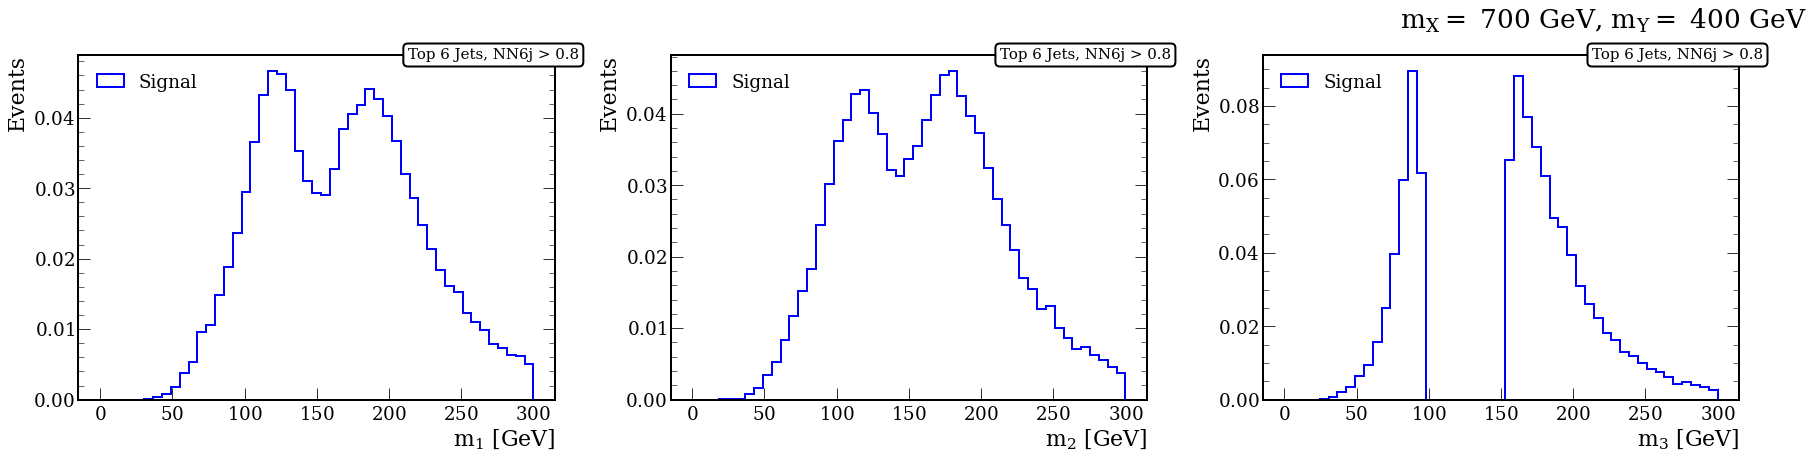

In [37]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

fig.suptitle(signal_tree.sample, x=.9, y=.93)

ax = axs[0]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(signal_tree.t6_higgs_m[:,0][CR_sgnl_one], bins=mH_bins, density=1, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)
# n_d, b = Hist(data_tree.t6_higgs_m[:,0][CR_data_one], bins=mH_bins, density=1, ax=ax, label='Data', color='black')
ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)
print(n_s.sum()/np.sqrt(n_d.sum()))
print(n_s.sum()/(SR_H3+n_s.sum()))
print(n_s.sum())

ax = axs[1]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(signal_tree.t6_higgs_m[:,1][CR_sgnl_one], bins=mH_bins, density=1, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
# n_d, b = Hist(data_tree.t6_higgs_m[:,1][CR_data_one], bins=mH_bins, density=1, ax=ax, label='Data', color='black')
ax.set_xlabel(r'$m_2$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

ax = axs[2]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(signal_tree.t6_higgs_m[:,2][CR_sgnl_one], bins=mH_bins, density=1, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
# n_d, b = Hist(data_tree.t6_higgs_m[:,2][CR_data_one], bins=mH_bins, density=1, ax=ax, label='Data', color='black')
ax.set_xlabel(r'$m_3$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

# ax = axs[1][0]
# ax.set_title('T6 mH1, NN6j > 0.8', loc='right')
# n_s, b = Hist(signal_tree.t6_higgs_m[:,0][CR_sgnl_cube], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)
# n_d, b = Hist(data_tree.t6_higgs_m[:,0][CR_data_cube], bins=mH_bins, ax=ax, label='Data', color='black')
# ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
# ax.set_ylabel('Events')
# ax.legend(loc=2)
# print(n_s.sum()/np.sqrt(n_d.sum()))
# print(n_s.sum()/(SR_H3+n_s.sum()))
# print(n_s.sum())

# ax = axs[1][1]
# ax.set_title('T6 mH2, NN6j > 0.8', loc='right')
# n_s, b = Hist(signal_tree.t6_higgs_m[:,1][CR_sgnl_cube], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
# n_d, b = Hist(data_tree.t6_higgs_m[:,1][CR_data_cube], bins=mH_bins, ax=ax, label='Data', color='black')
# ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
# ax.set_ylabel('Events')
# ax.legend(loc=2)

# ax = axs[1][2]
# ax.set_title('T6 mH3, NN6j > 0.8', loc='right')
# n_s, b = Hist(signal_tree.t6_higgs_m[:,2][CR_sgnl_cube], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
# n_d, b = Hist(data_tree.t6_higgs_m[:,2][CR_data_cube], bins=mH_bins, ax=ax, label='Data', color='black')
# ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
# ax.set_ylabel('Events')
# ax.legend(loc=2)

plt.tight_layout()

fig.savefig('plots/sig_data_CR/CR_mHcand.pdf')

1.0
0.0005618315787330745
0.9999999999999999


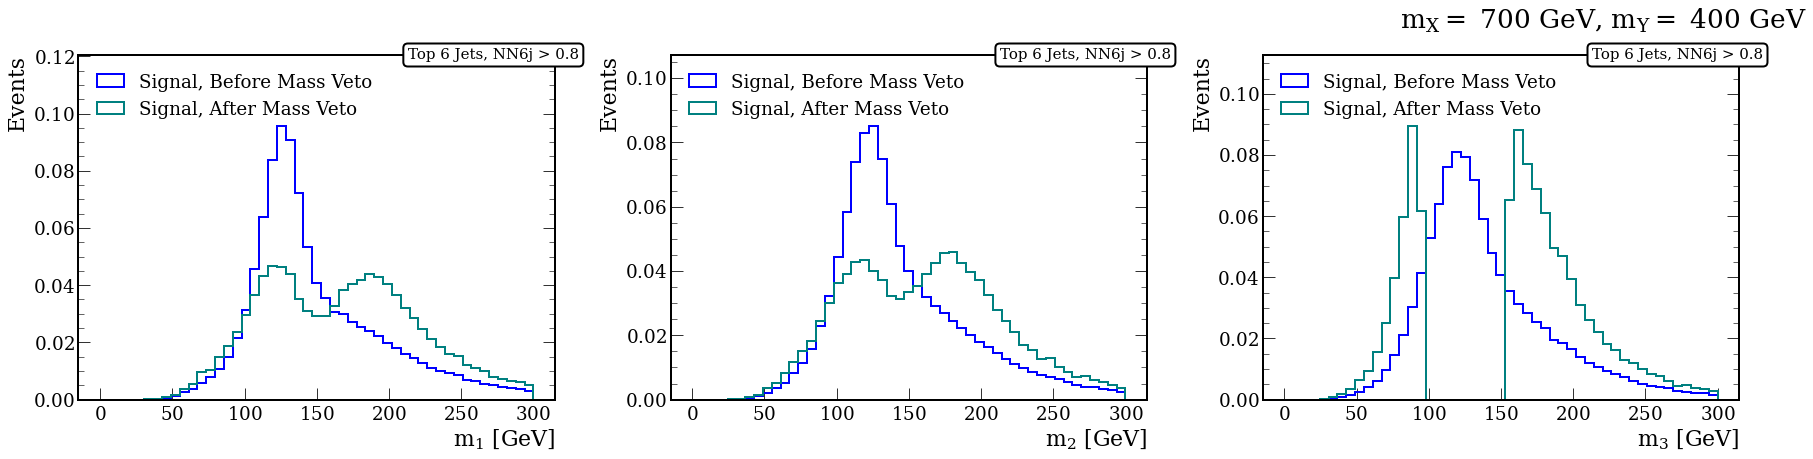

In [25]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

fig.suptitle(signal_tree.sample, x=.9, y=.93)

ax = axs[0]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(signal_tree.t6_higgs_m[:,0], bins=mH_bins, density=1, ax=ax, label='Signal, Before Mass Veto', color='blue', scale=signal_tree.scale)
n_s, b = Hist(signal_tree.t6_higgs_m[:,0][CR_sgnl_one], bins=mH_bins, density=1, ax=ax, label='Signal, After Mass Veto', color='teal', scale=signal_tree.scale)
ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)
print(n_s.sum()/np.sqrt(n_d.sum()))
print(n_s.sum()/(SR_H3+n_s.sum()))
print(n_s.sum())

ax = axs[1]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(signal_tree.t6_higgs_m[:,1], bins=mH_bins, density=1, ax=ax, label='Signal, Before Mass Veto', color='blue', scale=signal_tree.scale)#)
n_s, b = Hist(signal_tree.t6_higgs_m[:,1][CR_sgnl_one], bins=mH_bins, density=1, ax=ax, label='Signal, After Mass Veto', color='teal', scale=signal_tree.scale)#)
ax.set_xlabel(r'$m_2$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)

ax = axs[2]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(signal_tree.t6_higgs_m[:,2], bins=mH_bins, density=1, ax=ax, label='Signal, Before Mass Veto', color='blue', scale=signal_tree.scale)#)
n_s, b = Hist(signal_tree.t6_higgs_m[:,2][CR_sgnl_one], bins=mH_bins, density=1, ax=ax, label='Signal, After Mass Veto', color='teal', scale=signal_tree.scale)#)
ax.set_xlabel(r'$m_3$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)

# ax = axs[1][0]
# ax.set_title('T6 mH1, NN6j > 0.8', loc='right')
# n_s, b = Hist(signal_tree.t6_higgs_m[:,0][CR_sgnl_cube], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)
# n_d, b = Hist(data_tree.t6_higgs_m[:,0][CR_data_cube], bins=mH_bins, ax=ax, label='Data', color='black')
# ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
# ax.set_ylabel('Events')
# ax.legend(loc=2)
# print(n_s.sum()/np.sqrt(n_d.sum()))
# print(n_s.sum()/(SR_H3+n_s.sum()))
# print(n_s.sum())

# ax = axs[1][1]
# ax.set_title('T6 mH2, NN6j > 0.8', loc='right')
# n_s, b = Hist(signal_tree.t6_higgs_m[:,1][CR_sgnl_cube], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
# n_d, b = Hist(data_tree.t6_higgs_m[:,1][CR_data_cube], bins=mH_bins, ax=ax, label='Data', color='black')
# ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
# ax.set_ylabel('Events')
# ax.legend(loc=2)

# ax = axs[1][2]
# ax.set_title('T6 mH3, NN6j > 0.8', loc='right')
# n_s, b = Hist(signal_tree.t6_higgs_m[:,2][CR_sgnl_cube], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
# n_d, b = Hist(data_tree.t6_higgs_m[:,2][CR_data_cube], bins=mH_bins, ax=ax, label='Data', color='black')
# ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
# ax.set_ylabel('Events')
# ax.legend(loc=2)

plt.tight_layout()

fig.savefig('plots/sig_data_CR/CR_mHcand_sgnl_norm.pdf')

1205.9996976225575
0.4040345457983988
1205.9996976225573


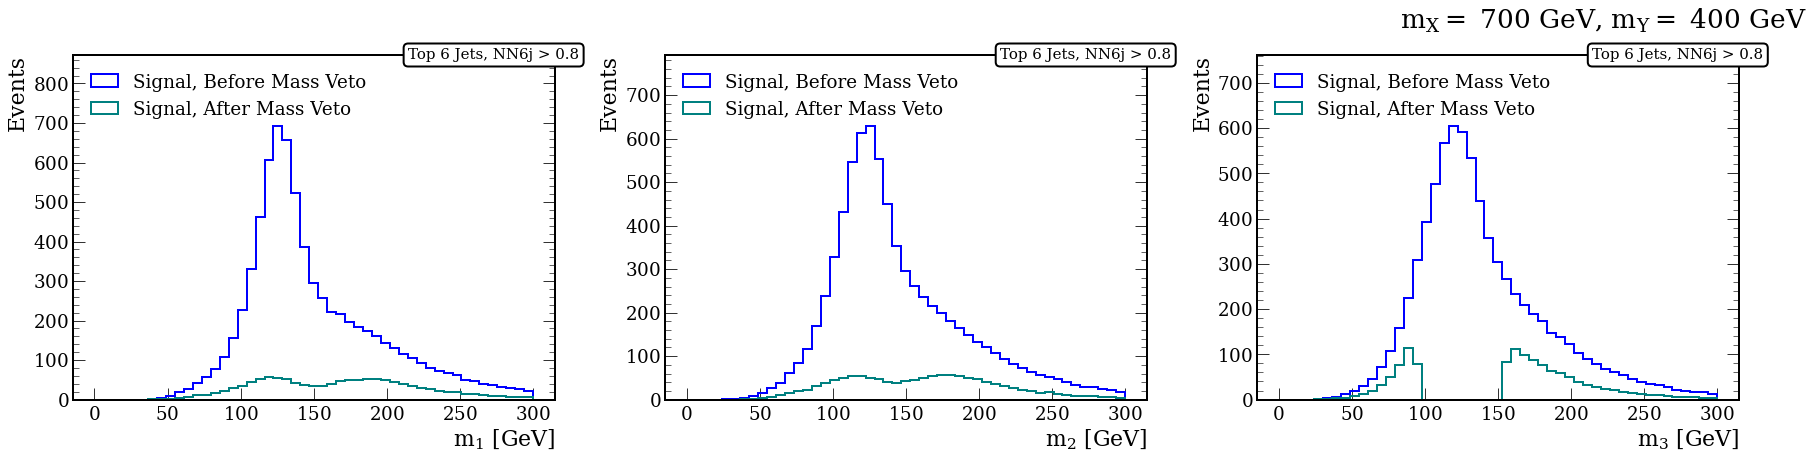

In [26]:
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

fig.suptitle(signal_tree.sample, x=.9, y=.93)

ax = axs[0]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(signal_tree.t6_higgs_m[:,0], bins=mH_bins, ax=ax, label='Signal, Before Mass Veto', color='blue', scale=signal_tree.scale)
n_s, b = Hist(signal_tree.t6_higgs_m[:,0][CR_sgnl_one], bins=mH_bins, ax=ax, label='Signal, After Mass Veto', color='teal', scale=signal_tree.scale)
ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)
print(n_s.sum()/np.sqrt(n_d.sum()))
print(n_s.sum()/(SR_H3+n_s.sum()))
print(n_s.sum())

ax = axs[1]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(signal_tree.t6_higgs_m[:,1], bins=mH_bins, ax=ax, label='Signal, Before Mass Veto', color='blue', scale=signal_tree.scale)#)
n_s, b = Hist(signal_tree.t6_higgs_m[:,1][CR_sgnl_one], bins=mH_bins, ax=ax, label='Signal, After Mass Veto', color='teal', scale=signal_tree.scale)#)
ax.set_xlabel(r'$m_2$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)

ax = axs[2]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(signal_tree.t6_higgs_m[:,2], bins=mH_bins, ax=ax, label='Signal, Before Mass Veto', color='blue', scale=signal_tree.scale)#)
n_s, b = Hist(signal_tree.t6_higgs_m[:,2][CR_sgnl_one], bins=mH_bins, ax=ax, label='Signal, After Mass Veto', color='teal', scale=signal_tree.scale)#)
ax.set_xlabel(r'$m_3$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)

# ax = axs[1][0]
# ax.set_title('T6 mH1, NN6j > 0.8', loc='right')
# n_s, b = Hist(signal_tree.t6_higgs_m[:,0][CR_sgnl_cube], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)
# n_d, b = Hist(data_tree.t6_higgs_m[:,0][CR_data_cube], bins=mH_bins, ax=ax, label='Data', color='black')
# ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
# ax.set_ylabel('Events')
# ax.legend(loc=2)
# print(n_s.sum()/np.sqrt(n_d.sum()))
# print(n_s.sum()/(SR_H3+n_s.sum()))
# print(n_s.sum())

# ax = axs[1][1]
# ax.set_title('T6 mH2, NN6j > 0.8', loc='right')
# n_s, b = Hist(signal_tree.t6_higgs_m[:,1][CR_sgnl_cube], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
# n_d, b = Hist(data_tree.t6_higgs_m[:,1][CR_data_cube], bins=mH_bins, ax=ax, label='Data', color='black')
# ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
# ax.set_ylabel('Events')
# ax.legend(loc=2)

# ax = axs[1][2]
# ax.set_title('T6 mH3, NN6j > 0.8', loc='right')
# n_s, b = Hist(signal_tree.t6_higgs_m[:,2][CR_sgnl_cube], bins=mH_bins, ax=ax, label='Signal', color='blue', scale=signal_tree.scale)#)
# n_d, b = Hist(data_tree.t6_higgs_m[:,2][CR_data_cube], bins=mH_bins, ax=ax, label='Data', color='black')
# ax.set_xlabel(r'$m_\mathrm{bb}$ [GeV]')
# ax.set_ylabel('Events')
# ax.legend(loc=2)

plt.tight_layout()

fig.savefig('plots/sig_data_CR/CR_mHcand_sgnl.pdf')

In [27]:
b_6j = signal_tree.b_6j_score > 0.8
b_3d = signal_tree.b_3d_score > 0.8

In [28]:
sgnl_tight_btag = signal_tree.t6_jet_btag > tight_b
sgnl_medium_btag = (signal_tree.t6_jet_btag > medium_b) & (signal_tree.t6_jet_btag < tight_b)
sgnl_loose_btag = (signal_tree.t6_jet_btag > loose_b) & (signal_tree.t6_jet_btag < medium_b)

data_tight_btag  = ((data_tree.t6_jet_btag > tight_b))
data_medium_btag = ((data_tree.t6_jet_btag > medium_b) & (data_tree.t6_jet_btag < tight_b))
data_loose_btag  = ((data_tree.t6_jet_btag > loose_b) & (data_tree.t6_jet_btag < medium_b))

sgnl_n_btag = signal_tree.t6_jet_btag > loose_b
data_n_btag = (data_tree.t6_jet_btag > loose_b)

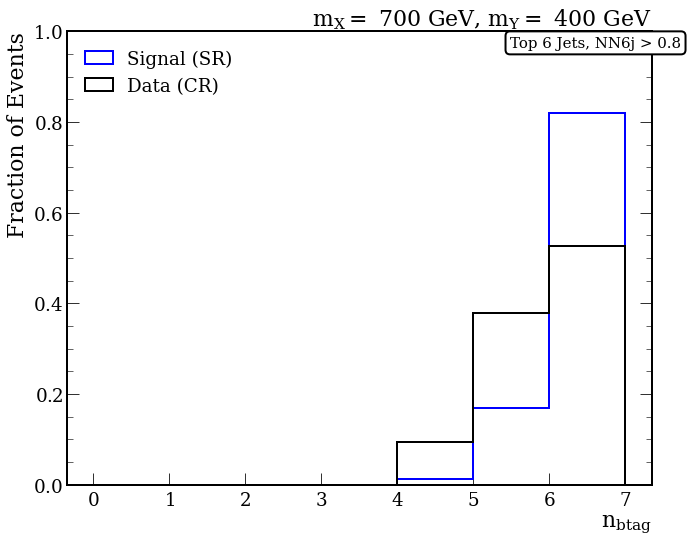

In [29]:
bins = np.arange(8)
# fig, axs = plt.subplots(figsize=(15,6), nrows=1, ncols=2)
fig, ax = plt.subplots(figsize=(10,8))

bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, .99, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
ax.set_title(signal_tree.sample, loc='right')

n_s, b = Hist(ak.sum(sgnl_n_btag[SR_sgnl_one], axis=1), bins=bins, density=1, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)
n_d, b = Hist(ak.sum(data_n_btag[CR_data_one], axis=1), bins=bins, density=1, ax=ax, label='Data (CR)', color='black')
ax.set_xlabel(r'$n_\mathrm{btag}$')
ax.set_ylabel('Fraction of Events')
ax.legend(loc=2)
ax.set_ylim(0,1)

# ax = axs[1][0]
# ax.set_title('T6, NN6j > 0.8', loc='right')
# n_s, b = Hist(ak.sum(sgnl_n_btag[SR_sgnl_cube], axis=1), bins=bins, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)
# n_d, b = Hist(ak.sum(data_n_btag[CR_data_cube], axis=1), bins=bins, ax=ax, label='Data (CR)', color='black')
# ax.set_xlabel(r'$n_\mathrm{btag}$')
# ax.set_ylabel('Count')
# ax.legend(loc=2)

# ax = axs[1][1]
# ax.set_title('T6, NN6j > 0.8', loc='right')
# n_s, b = Hist(ak.sum(sgnl_n_btag[SR_sgnl_cube], axis=1), bins=bins, density=1, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)
# n_d, b = Hist(ak.sum(data_n_btag[CR_data_cube], axis=1), bins=bins, density=1, ax=ax, label='Data (CR)', color='black')
# ax.set_xlabel(r'$n_\mathrm{btag}$')
# ax.set_ylabel('Count')
# ax.legend(loc=2)

plt.tight_layout()
fig.savefig('plots/sig_data_CR/n_loose.pdf')

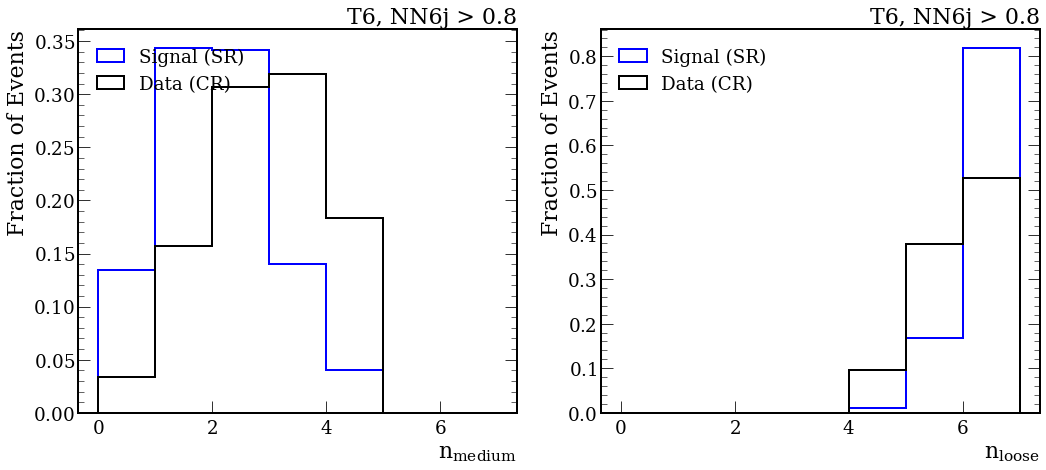

In [30]:
bins = np.arange(8)
fig, axs = plt.subplots(figsize=(15,7), nrows=1, ncols=2)

ax = axs[0]
ax.set_title('T6, NN6j > 0.8', loc='right')
n_s, b = Hist(ak.sum((sgnl_loose_btag + sgnl_medium_btag)[SR_sgnl_one], axis=1), bins=bins, density=1, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)
n_d, b = Hist(ak.sum((data_loose_btag + data_medium_btag)[CR_data_one], axis=1), bins=bins, density=1, ax=ax, label='Data (CR)', color='black')
ax.set_xlabel(r'$n_\mathrm{medium}$')
ax.set_ylabel('Fraction of Events')
ax.legend(loc=2)

ax = axs[1]
ax.set_title('T6, NN6j > 0.8', loc='right')
n_s, b = Hist(ak.sum(sgnl_n_btag[SR_sgnl_one], axis=1), bins=bins, density=1, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)
n_d, b = Hist(ak.sum(data_n_btag, axis=1)[CR_data_one], bins=bins, density=1, ax=ax, label='Data (CR)', color='black')
ax.set_xlabel(r'$n_\mathrm{loose}$')
ax.set_ylabel('Fraction of Events')
ax.legend(loc=2)

plt.tight_layout()

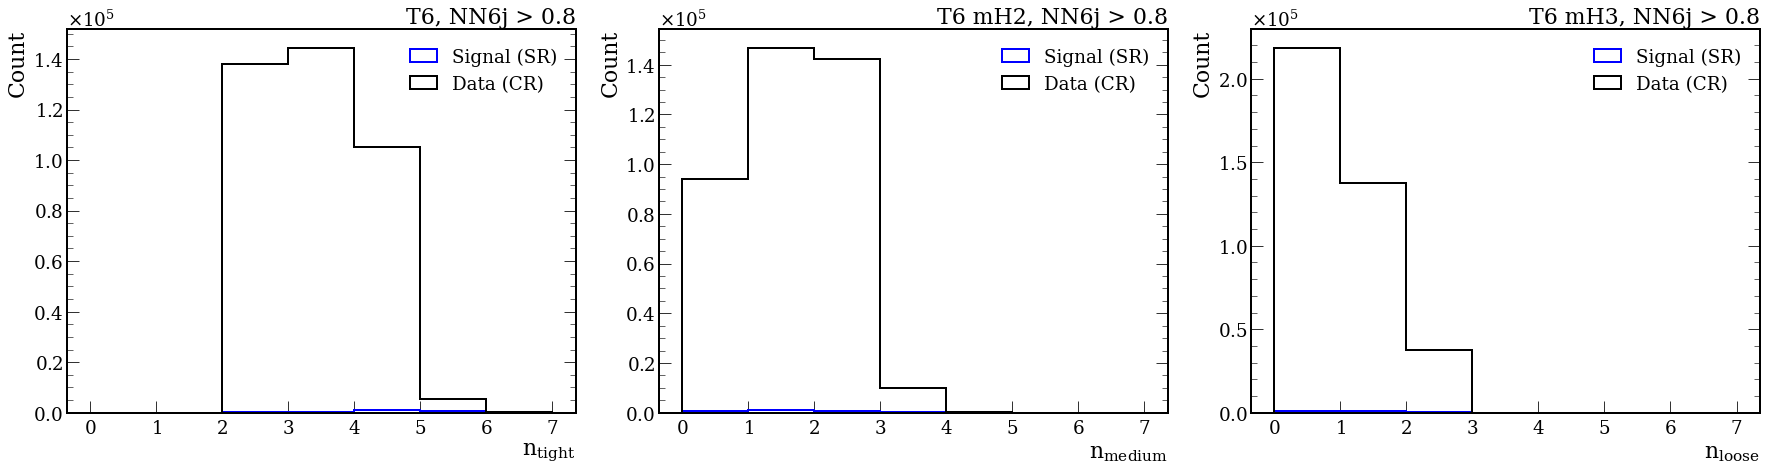

In [31]:
bins = np.arange(8)
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

ax = axs[0]
ax.set_title('T6, NN6j > 0.8', loc='right')
n_s, b = Hist(ak.sum(sgnl_tight_btag[SR_sgnl_one], axis=1), bins=bins, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)
n_d, b = Hist(ak.sum(data_tight_btag, axis=1), bins=bins, ax=ax, label='Data (CR)', color='black')
ax.set_xlabel(r'$n_\mathrm{tight}$')
ax.set_ylabel('Count')
# ax.legend(loc=2)

ax = axs[1]
ax.set_title('T6 mH2, NN6j > 0.8', loc='right')
n_s, b = Hist(ak.sum(sgnl_medium_btag[SR_sgnl_one], axis=1), bins=bins, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)#)
n_d, b = Hist(ak.sum(data_medium_btag, axis=1), bins=bins, ax=ax, label='Data (CR)', color='black')
ax.set_xlabel(r'$n_\mathrm{medium}$')
ax.set_ylabel('Count')
# ax.legend(loc=2)

ax = axs[2]
ax.set_title('T6 mH3, NN6j > 0.8', loc='right')
n_s, b = Hist(ak.sum(sgnl_loose_btag[SR_sgnl_one], axis=1), bins=bins, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)#)
n_d, b = Hist(ak.sum(data_loose_btag, axis=1), bins=bins, ax=ax, label='Data (CR)', color='black')
ax.set_xlabel(r'$n_\mathrm{loose}$')
ax.set_ylabel('Count')
# ax.legend(loc=2)

plt.tight_layout()

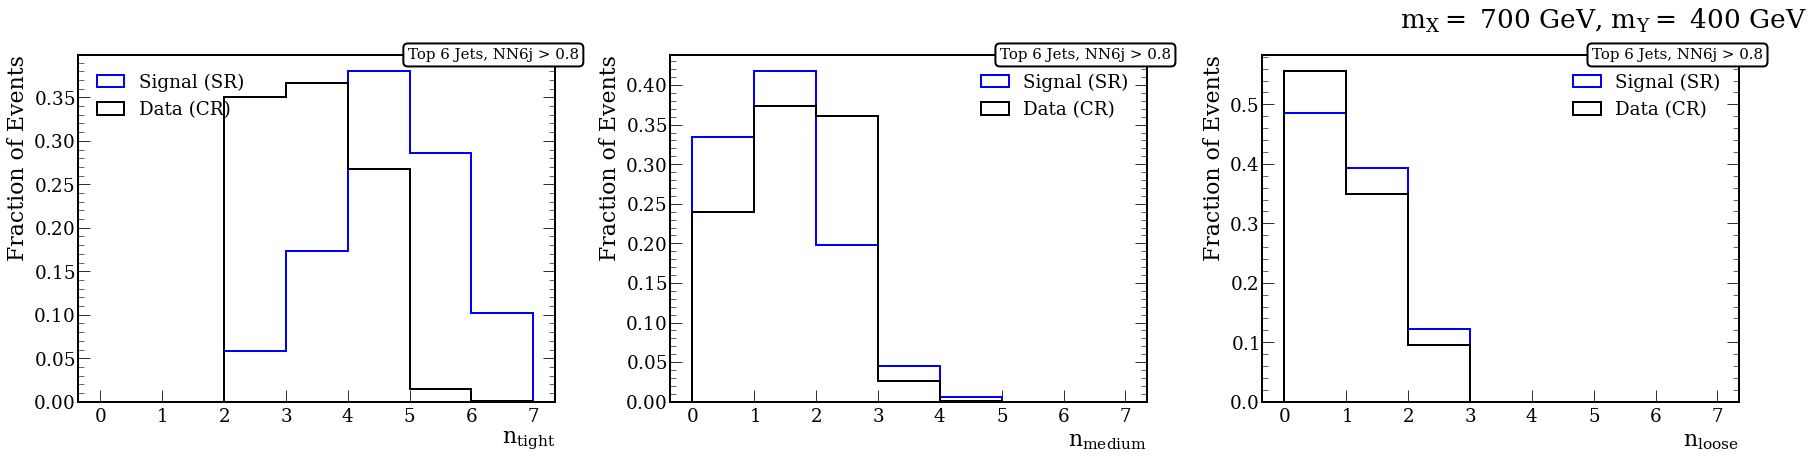

In [32]:
bins = np.arange(8)
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

fig.suptitle(signal_tree.sample, x=.9, y=.93)

ax = axs[0]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(ak.sum(sgnl_tight_btag[SR_sgnl_one], axis=1), bins=bins, density=1, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)
n_d, b = Hist(ak.sum(data_tight_btag, axis=1), bins=bins, density=1, ax=ax, label='Data (CR)', color='black')
ax.set_xlabel(r'$n_\mathrm{tight}$')
ax.set_ylabel('Fraction of Events')
ax.legend(loc=2)
eff = 1-np.cumsum(n_s)
rej = np.cumsum(n_d)

ax = axs[1]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(ak.sum(sgnl_medium_btag[SR_sgnl_one], axis=1), bins=bins, density=1, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)#)
n_d, b = Hist(ak.sum(data_medium_btag, axis=1), bins=bins, density=1, ax=ax, label='Data (CR)', color='black')
ax.set_xlabel(r'$n_\mathrm{medium}$')
ax.set_ylabel('Fraction of Events')
# ax.legend(loc=2)

ax = axs[2]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(ak.sum(sgnl_loose_btag[SR_sgnl_one], axis=1), bins=bins, density=1, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)#)
n_d, b = Hist(ak.sum(data_loose_btag, axis=1), bins=bins, density=1, ax=ax, label='Data (CR)', color='black')
ax.set_xlabel(r'$n_\mathrm{loose}$')
ax.set_ylabel('Fraction of Events')
# ax.legend(loc=2)

plt.tight_layout()
fig.savefig('plots/sig_data_CR/n_btag_groups.pdf')

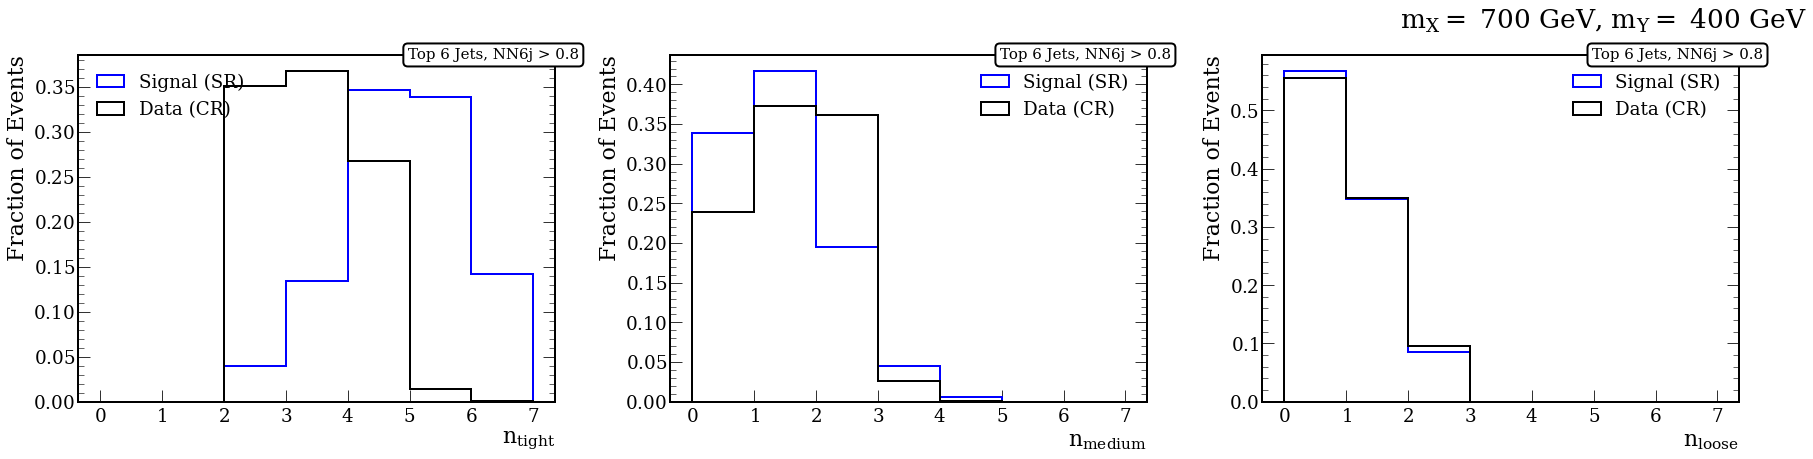

In [33]:
bins = np.arange(8)
fig, axs = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

fig.suptitle(signal_tree.sample, x=.9, y=.93)

ax = axs[0]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(ak.sum(sgnl_tight_btag[SR_sgnl_one & (signal_tree.nfound_t6 == 6)], axis=1), bins=bins, density=1, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)
n_d, b = Hist(ak.sum(data_tight_btag, axis=1), bins=bins, density=1, ax=ax, label='Data (CR)', color='black')
ax.set_xlabel(r'$n_\mathrm{tight}$')
ax.set_ylabel('Fraction of Events')
ax.legend(loc=2)
eff_6b = 1-np.cumsum(n_s)
rej_6b = np.cumsum(n_d)

ax = axs[1]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(ak.sum(sgnl_medium_btag[SR_sgnl_one & (signal_tree.nfound_t6 == 6)], axis=1), bins=bins, density=1, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)#)
n_d, b = Hist(ak.sum(data_medium_btag, axis=1), bins=bins, density=1, ax=ax, label='Data (CR)', color='black')
ax.set_xlabel(r'$n_\mathrm{medium}$')
ax.set_ylabel('Fraction of Events')
# ax.legend(loc=2)

ax = axs[2]
bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(ak.sum(sgnl_loose_btag[SR_sgnl_one & (signal_tree.nfound_t6 == 6)], axis=1), bins=bins, density=1, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)#)
n_d, b = Hist(ak.sum(data_loose_btag, axis=1), bins=bins, density=1, ax=ax, label='Data (CR)', color='black')
ax.set_xlabel(r'$n_\mathrm{loose}$')
ax.set_ylabel('Fraction of Events')
# ax.legend(loc=2)

plt.tight_layout()
fig.savefig('plots/sig_data_CR/n_btag_groups_sgnl_higgs_reco.pdf')

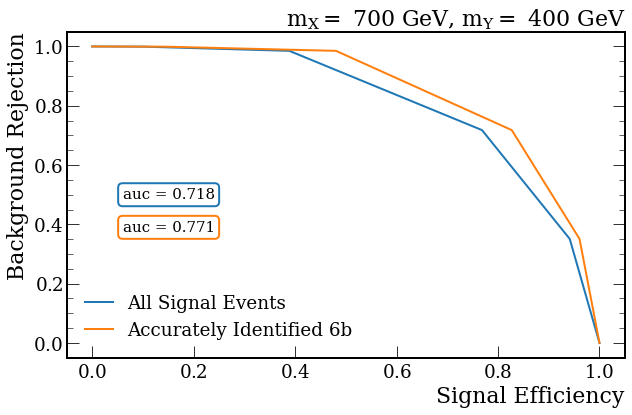

In [34]:
fig, ax = plt.subplots()

ax.set_title(signal_tree.sample, loc='right')
ax.plot(eff, rej, linewidth=2, label='All Signal Events')
ax.plot(eff_6b, rej_6b, linewidth=2, label='Accurately Identified 6b')
dx = eff[:-1]-eff[1:]
auc = np.sum(rej[:-1]*dx)
dx = eff_6b[:-1]-eff_6b[1:]
auc_6b = np.sum(rej[:-1]*dx)
ax.legend()
bbox_props = dict(boxstyle="round,pad=0.3", fc='white', ec='C0', lw=2)
t = ax.text(.1, .5, f"auc = {auc:.3f}", ha="left", va="center", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
bbox_props = dict(boxstyle="round,pad=0.3", fc='white', ec='C1', lw=2)
t = ax.text(.1, .4, f"auc = {auc_6b:.3f}", ha="left", va="center", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
ax.set_xlabel(r'Signal Efficiency')
ax.set_ylabel('Background Rejection')

fig.savefig('roc_tight_btag.pdf')

Text(0, 1, 'Fraction of Events')

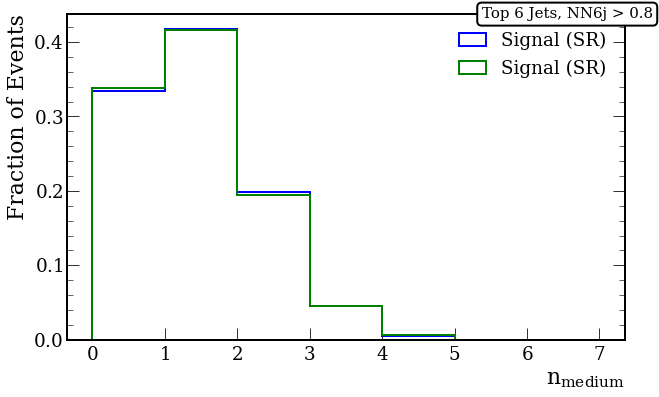

In [35]:
bins = np.arange(8)
fig, ax = plt.subplots()

bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, 1.02, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
n_s, b = Hist(ak.sum(sgnl_medium_btag[SR_sgnl_one], axis=1), bins=bins, density=1, ax=ax, label='Signal (SR)', color='blue', scale=signal_tree.scale)#)
n_s, b = Hist(ak.sum(sgnl_medium_btag[SR_sgnl_one & (signal_tree.nfound_t6 == 6)], axis=1), bins=bins, density=1, ax=ax, label='Signal (SR)', color='green', scale=signal_tree.scale)#)
ax.set_xlabel(r'$n_\mathrm{medium}$')
ax.set_ylabel('Fraction of Events')


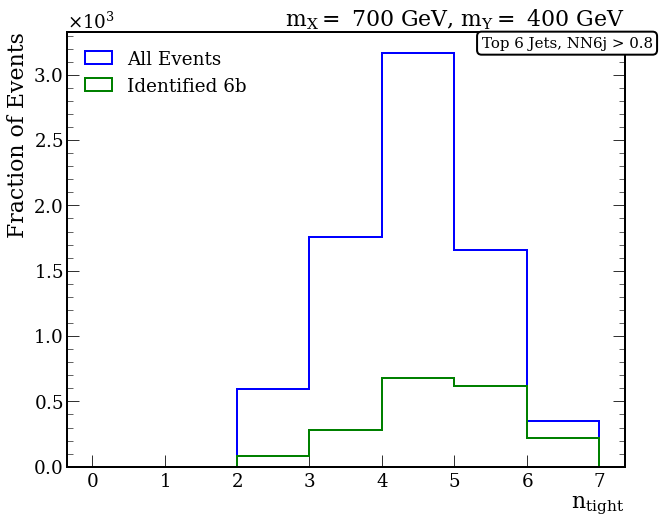

In [36]:
bins = np.arange(8)
fig, ax = plt.subplots(figsize=(10,8))


bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
t = ax.text(1.05, .99, "Top 6 Jets, NN6j > 0.8", ha="right", va="top", transform=ax.transAxes,
            size=15,
            bbox=bbox_props)
ax.set_title(signal_tree.sample, loc='right')

n_s, b = Hist(ak.sum(signal_tree.t6_jet_btag > tight_b, axis=1), bins=bins, ax=ax, label='All Events', color='blue', scale=signal_tree.scale)
n_s, b = Hist(ak.sum(signal_tree.t6_jet_btag > tight_b, axis=1)[signal_tree.nfound_t6 == 6], label='Identified 6b', bins=bins, ax=ax, color='green', scale=signal_tree.scale)
ax.set_xlabel(r'$n_\mathrm{tight}$')
ax.set_ylabel('Fraction of Events')
ax.legend(loc=2)

fig.savefig('plots/sig_data_CR/sgnl_ntight_allvcorrect.pdf')

In [ ]:
# from lmfit.models import GaussianModel, SkewedGaussianModel, BreitWignerModel
# from math import erf
# from scipy.special import erf, erfc

In [ ]:
# def gaus(x, a, c, s):
#     return a*np.exp(-(x-c)**2/(2*s**2))

# def skew_gaus(x, a, c, s, g):
#     return a*np.exp(-(x-c)**2/(2*s**2))*(1+erf(G*(x-c)/(s*np.sqrt(2))))

# def BrietWigner(x, a, c, s, q):
#     return a*(q*s/2+x-c)**2/((s/2)**2+(x-c)**2)

In [ ]:
# nrows = 1
# ncols = 3
# fig, axs = plt.subplots(figsize=(ncols*10, nrows*6), nrows=nrows, ncols=ncols)

# # Control region defined as
# n, b = np.histogram(mH.to_numpy(), bins=np.linspace(0,300,100))
# x = x_bins(b)
# mod = GaussianModel()

# pars = mod.guess(n, x=x)
# out = mod.fit(n, pars, x=x)
# # print(out.values)

# A = out.values['amplitude']
# C = out.values['center']
# S = out.values['sigma']
# fwhm = out.values['fwhm']
# H = out.values['height']

# # print(out.fit_report(min_correl=0.25))
# n, b = Hist(x, weights=n, bins=b, ax=axs[0])
# ax.plot(x, gaus(x, H, C, S))
# ax.set_title('Gaussian')
# bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
# t = ax.text(1.1, 1, f"Amplitude = {as_si(H, 0)}\nCenter = {int(C)} GeV\nSigma = {int(S)} GeV", ha="right", va="center", transform=ax.transAxes,
#             size=15,
#             bbox=bbox_props)

# # Control region defined as
# n, b = np.histogram(mH.to_numpy(), bins=np.linspace(0,300,100))
# x = x_bins(b)
# mod = SkewedGaussianModel()

# pars = mod.guess(n, x=x)
# out = mod.fit(n, pars, x=x)
# # print(out.values)

# A = out.values['amplitude']
# C = out.values['center']
# S = out.values['sigma']
# G = out.values['gamma']

# # print(out.fit_report(min_correl=0.25))
# n, b = Hist(x, weights=n, bins=b, ax=axs[1])
# ax.plot(x, skew_gaus(x, A/(S*np.sqrt(2*np.pi)), C, S, G))
# ax.set_title('Skewed Gaussian')
# bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
# t = ax.text(1.1, 1, f"Amplitude = {as_si(A/(S*np.sqrt(2*np.pi)), 0)}\nCenter = {int(C)} GeV\nSigma = {int(S)} GeV\nGamma = {int(G)}", ha="right", va="center", transform=ax.transAxes,
#             size=15,
#             bbox=bbox_props)


# n, b = np.histogram(mH.to_numpy(), bins=np.linspace(0,300,100))
# x = x_bins(b)
# mod = BreitWignerModel()

# pars = mod.guess(n, x=x)
# out = mod.fit(n, pars, x=x)
# print(out.values)

# A = out.values['amplitude']
# C = out.values['center']
# S = out.values['sigma']
# q = out.values['q']

# # print(out.fit_report(min_correl=0.25))
# n, b = Hist(x, weights=n, bins=b, ax=axs[2])
# ax.plot(x, BrietWigner(x, A, C, S, q))
# ax.set_title('Breit Wigner')
# bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
# t = ax.text(1.1, 1, f"Amplitude = {as_si(A, 0)}\nCenter = {int(C)} GeV\nSigma = {int(S)} GeV\nGamma = {int(G)}", ha="right", va="center", transform=ax.transAxes,
#             size=15,
#             bbox=bbox_props)

In [ ]:
# nrows = 1
# ncols = 2
# fig, axs = plt.subplots(figsize=(ncols*10, nrows*6), nrows=nrows, ncols=ncols)

# n, b = np.histogram(HY2.m.to_numpy(), bins=np.linspace(0,300,100))
# x = x_bins(b)
# mod = GaussianModel()

# pars = mod.guess(n, x=x)
# out = mod.fit(n, pars, x=x)
# # print(out.values)

# H = out.values['height']
# C = out.values['center']
# S = out.values['sigma']

# # print(out.fit_report(min_correl=0.25))
# n, b = Hist(x, weights=n, bins=b, ax=axs[0])
# ax.plot(x, gaus(x, H, C, S))
# ax.set_title('Gaussian')
# bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
# t = ax.text(1.1, 1, f"Amplitude = {as_si(H, 0)}\nCenter = {int(C)} GeV\nSigma = {int(S)} GeV", ha="right", va="center", transform=ax.transAxes,
#             size=15,
#             bbox=bbox_props)


# n, b = np.histogram(HY2.m.to_numpy(), bins=np.linspace(0,300,100))
# x = x_bins(b)
# mod = SkewedGaussianModel()

# pars = mod.guess(n, x=x)
# out = mod.fit(n, pars, x=x)
# # print(out.values)

# A = out.values['amplitude']
# C = out.values['center']
# S = out.values['sigma']
# G = out.values['gamma']

# # print(out.fit_report(min_correl=0.25))
# n, b = Hist(x, weights=n, bins=b, ax=axs[1])
# ax.plot(x, skew_gaus(x, A/(S*np.sqrt(2*np.pi)), C, S, G))
# ax.set_title('Skewed Gaussian')
# bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
# t = ax.text(1.1, 1, f"Amplitude = {as_si(A/(S*np.sqrt(2*np.pi)), 0)}\nCenter = {int(C)} GeV\nSigma = {int(S)} GeV\nGamma = {int(G)}", ha="right", va="center", transform=ax.transAxes,
#             size=15,
#             bbox=bbox_props)

In [ ]:
# t6_mH1_6jcut_3mHcut_list = []
# t6_mH2_6jcut_3mHcut_list = []
# t6_mH3_6jcut_3mHcut_list = []

# t6_mH1_6jcut_mH3cut_list = []
# t6_mH2_6jcut_mH3cut_list = []
# t6_mH3_6jcut_mH3cut_list = []

# t6_mH1_6jcut_3mHcut_SR_list = []
# t6_mH2_6jcut_3mHcut_SR_list = []
# t6_mH3_6jcut_3mHcut_SR_list = []

# t6_mH1_6jcut_mH3cut_SR_list = []
# t6_mH2_6jcut_mH3cut_SR_list = []
# t6_mH3_6jcut_mH3cut_SR_list = []

# for mH_arr, score_6j in zip(bkgd_tree.t6_higgs_m, bkgd_tree.b_6j_score):

#     t6_mH1_6jcut_3mHcut_list.append(mH_arr[:,0][(score_6j > 0.8) & ak.all(abs(mH_arr - 125) > 60, axis=1)])
#     t6_mH2_6jcut_3mHcut_list.append(mH_arr[:,1][(score_6j > 0.8) & ak.all(abs(mH_arr - 125) > 60, axis=1)])
#     t6_mH3_6jcut_3mHcut_list.append(mH_arr[:,2][(score_6j > 0.8) & ak.all(abs(mH_arr - 125) > 60, axis=1)])

#     t6_mH1_6jcut_3mHcut_SR_list.append(mH_arr[:,0][(score_6j > 0.8) & ak.all(abs(mH_arr - 125) < 60, axis=1)])
#     t6_mH2_6jcut_3mHcut_SR_list.append(mH_arr[:,1][(score_6j > 0.8) & ak.all(abs(mH_arr - 125) < 60, axis=1)])
#     t6_mH3_6jcut_3mHcut_SR_list.append(mH_arr[:,2][(score_6j > 0.8) & ak.all(abs(mH_arr - 125) < 60, axis=1)])

#     t6_mH1_6jcut_mH3cut_list.append(mH_arr[:,0][(score_6j > 0.8) & (abs(mH_arr[:,2] - 125) > 60)])
#     t6_mH2_6jcut_mH3cut_list.append(mH_arr[:,1][(score_6j > 0.8) & (abs(mH_arr[:,2] - 125) > 60)])
#     t6_mH3_6jcut_mH3cut_list.append(mH_arr[:,2][(score_6j > 0.8) & (abs(mH_arr[:,2] - 125) > 60)])

#     t6_mH1_6jcut_mH3cut_SR_list.append(mH_arr[:,0][(score_6j > 0.8) & (abs(mH_arr[:,2] - 125) < 60)])
#     t6_mH2_6jcut_mH3cut_SR_list.append(mH_arr[:,1][(score_6j > 0.8) & (abs(mH_arr[:,2] - 125) < 60)])
#     t6_mH3_6jcut_mH3cut_SR_list.append(mH_arr[:,2][(score_6j > 0.8) & (abs(mH_arr[:,2] - 125) < 60)])